
# Assignment: Linear Regression, Logistic Regression, and K-Means (From Scratch)

**Instructions**
- You are NOT allowed to use `scikit-learn` for model implementation, scaling.
- You may use it for implementation of clustering
- You may use: `numpy`, `matplotlib`, and standard Python libraries only.
- Every step (scaling, loss, gradients, optimization) must be implemented manually.
- Clearly comment your code and explain your reasoning in Markdown cells.


## Question 1: Linear Regression from Scratch (with Standardization and Regularization)

You are given a dataset `(X, y)`.

### Tasks
1. Implement **StandardScaler manually**:
   - Compute mean and standard deviation for each feature.
   - Standardize the features.
2. Implement **Linear Regression using Gradient Descent**.
3. Add **L2 Regularization (Ridge Regression)**.
4. Plot:
   - Loss vs iterations
   - True vs predicted values

Do NOT use `sklearn`.


In [ ]:

import numpy as np
import matplotlib.pyplot as plt


In [ ]:

# Implement StandardScaler manually ,  first read about it, how it works and then implement it
class StandardScalerManual:
    def fit(self, X):
        self.mean_ = np.mean(X, axis=0)
        self.std_ = np.std(X, axis=0)
        return self

    def transform(self, X):
        return (X - self.mean_) / self.std_

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)


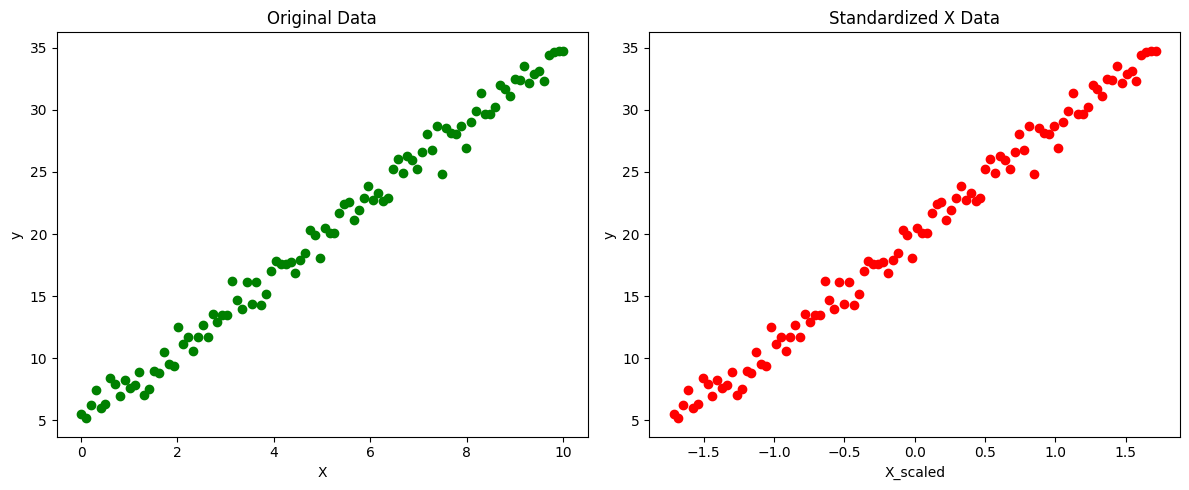

In [ ]:
np.random.seed(42)

X = np.linspace(0, 10, 100).reshape(-1, 1)
y = 3 * X.squeeze() + 5 + np.random.randn(100) * 1.0
# transforming X
scaled = StandardScalerManual()
X_scaled = scaled.fit_transform(X)

# Plot side by side
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

# Original data
plt.subplot(1,2,1)
plt.scatter(X, y, color='green')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Original Data")

# Standardized data
plt.subplot(1,2,2)
plt.scatter(X_scaled, y, color='red')
plt.xlabel("X_scaled")
plt.ylabel("y")
plt.title("Standardized X Data")

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class LinearRegressionGD:
    def __init__(self, lr=0.01, epochs=1000):
        self.lr = lr
        self.epochs = epochs

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Initialize weights and bias
        self.w = np.zeros(n_features)
        self.b = 0.0
        self.losses = []

        for _ in range(self.epochs):
            y_pred = X @ self.w + self.b

            # Compute MSE
            loss = np.mean((y - y_pred) ** 2)
            self.losses.append(loss)

            # Gradients
            dw = (-2 / n_samples) * (X.T @ (y - y_pred))
            db = (-2 / n_samples) * np.sum(y - y_pred)

            # Update weights
            self.w -= self.lr * dw
            self.b -= self.lr * db

    def predict(self, X):
        return X @ self.w + self.b


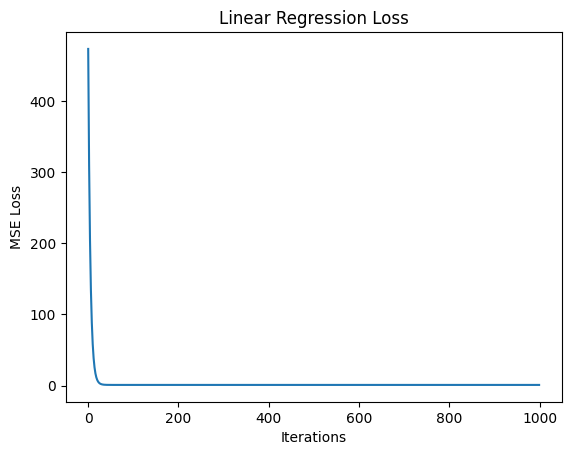

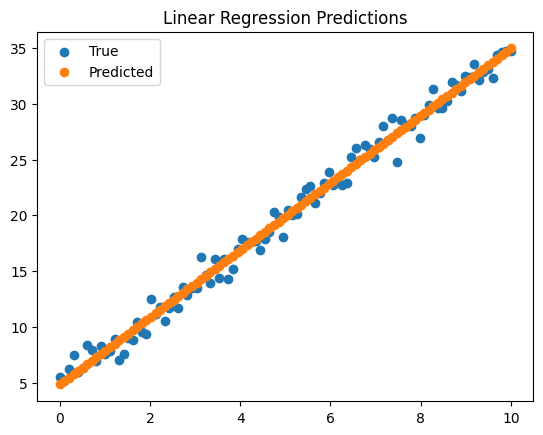

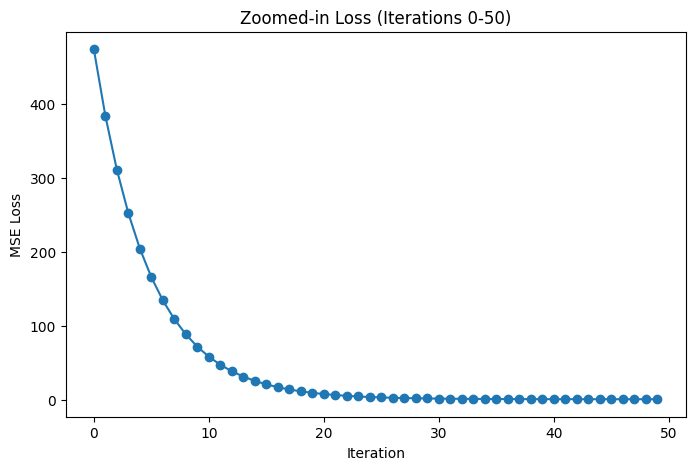

In [ ]:
# Example using your scaled X and y
model = LinearRegressionGD(lr=0.05, epochs=1000)
model.fit(X_scaled, y)
y_pred = model.predict(X_scaled)

# Loss vs iterations
plt.figure()
plt.plot(model.losses)
plt.xlabel("Iterations")
plt.ylabel("MSE Loss")
plt.title("Linear Regression Loss")
plt.show()

# True vs predicted
plt.figure()
plt.scatter(X, y, label="True")
plt.scatter(X, y_pred, label="Predicted")
plt.legend()
plt.title("Linear Regression Predictions")
plt.show()
plt.figure(figsize=(8,5))
plt.plot(model.losses[:50], marker='o')
plt.xlabel("Iteration")
plt.ylabel("MSE Loss")
plt.title("Zoomed-in Loss (Iterations 0-50)")
plt.show()

#gradient descent linear regression,very slow since only one dimentional input so I will use newton method.


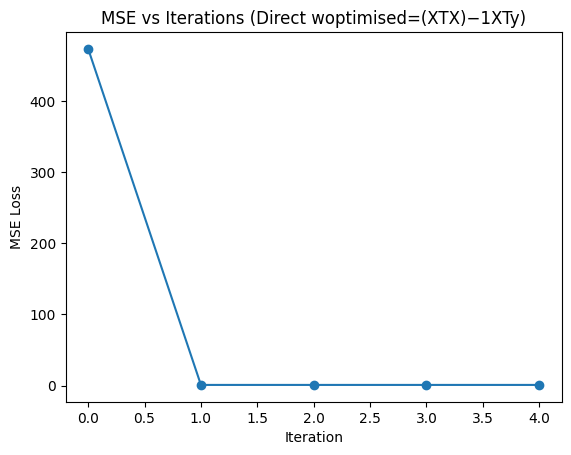

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class LinearRegressionNewton:
    def __init__(self):
        self.weights = None
        self.bias = None
        self.losses = []

    def fit(self, inputs, targets, steps=5):
        samples, features = inputs.shape
        data = np.hstack([inputs, np.ones((samples, 1))])
        params = np.zeros(features + 1)

        for _ in range(steps):
            pred = data @ params
            error = targets - pred
            grad = -2 * data.T @ error / samples
            hess = 2 * data.T @ data / samples
            params -= np.linalg.inv(hess) @ grad
            loss = np.mean(error ** 2)
            self.losses.append(loss)

        self.weights = params[:-1]
        self.bias = params[-1]

    def predict(self, inputs):
        return inputs @ self.weights + self.bias

# Training the model now
model = LinearRegressionNewton()
model.fit(X_scaled, y, steps=5)
y_pred = model.predict(X_scaled)

# Plot MSE vs iterations
plt.figure()
plt.plot(model.losses, marker='o')
plt.xlabel("Iteration")
plt.ylabel("MSE Loss")
plt.title("MSE vs Iterations (Direct woptimised​=(XTX)−1XTy)")
plt.show()



Weight: [8.78751188]
Bias: 19.896153482605907
MSE per iteration: [np.float64(473.89219307335867), np.float64(0.8149047134980785), np.float64(0.8149047134980785), np.float64(0.8149047134980785), np.float64(0.8149047134980785)]


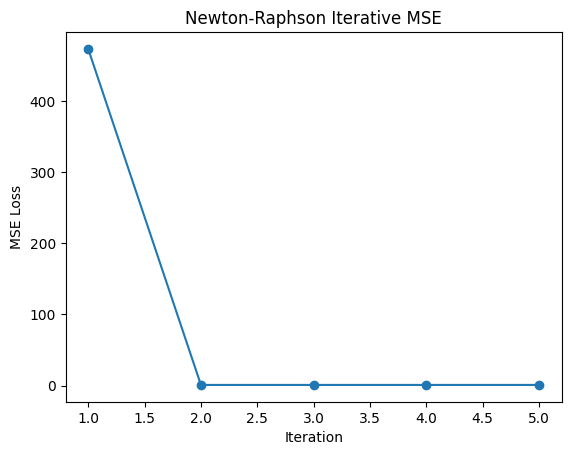

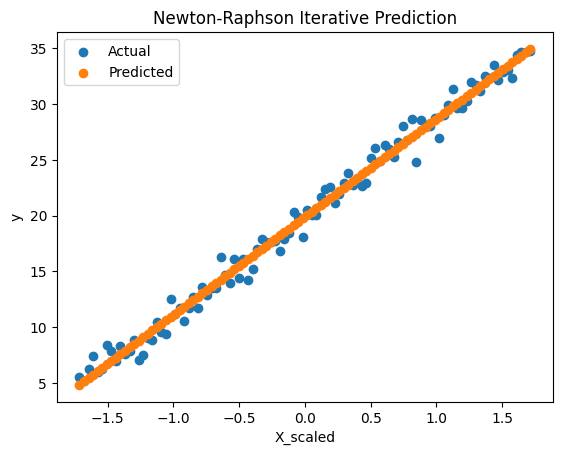

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Now,I am augmenting the X with ones for bias
X_aug = np.hstack([X_scaled, np.ones((X_scaled.shape[0], 1))])
params = np.zeros(X_aug.shape[1])
losses = []

# Iterative Newton-Ralphson
steps = 5
for _ in range(steps):
    pred = X_aug @ params
    error = y - pred
    grad = -2 * X_aug.T @ error / X_aug.shape[0]
    hess = 2 * X_aug.T @ X_aug / X_aug.shape[0]
    params -= np.linalg.inv(hess) @ grad
    losses.append(np.mean(error**2))

weight, bias = params[:-1], params[-1]

# Predictions
y_pred = X_aug @ params

# Print results
print("Weight:", weight)
print("Bias:", bias)
print("MSE per iteration:", losses)

# Plot MSE vs iterations
plt.figure()
plt.plot(range(1, steps+1), losses, marker='o')
plt.xlabel("Iteration")
plt.ylabel("MSE Loss")
plt.title("Newton-Raphson Iterative MSE")
plt.show()

# Plot truth vs Predicted
plt.figure()
plt.scatter(X_scaled, y, label="Actual")
plt.scatter(X_scaled, y_pred, label="Predicted")
plt.xlabel("X_scaled")
plt.ylabel("y")
plt.legend()
plt.title("Newton-Raphson Iterative Prediction")
plt.show()


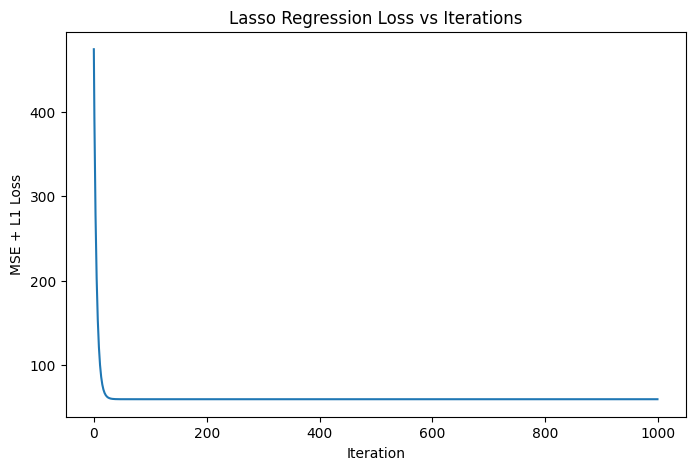

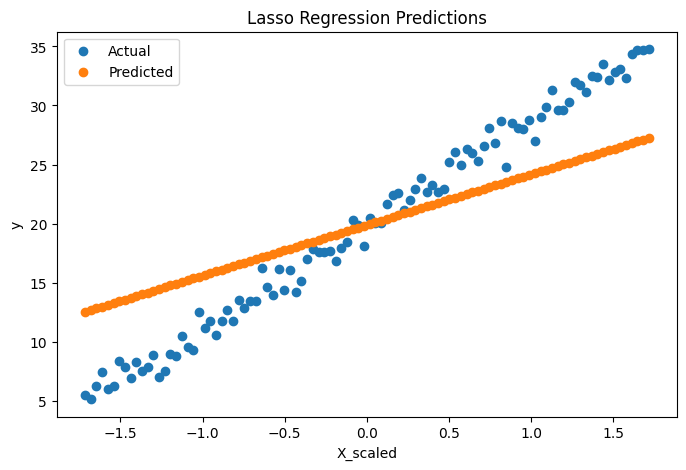

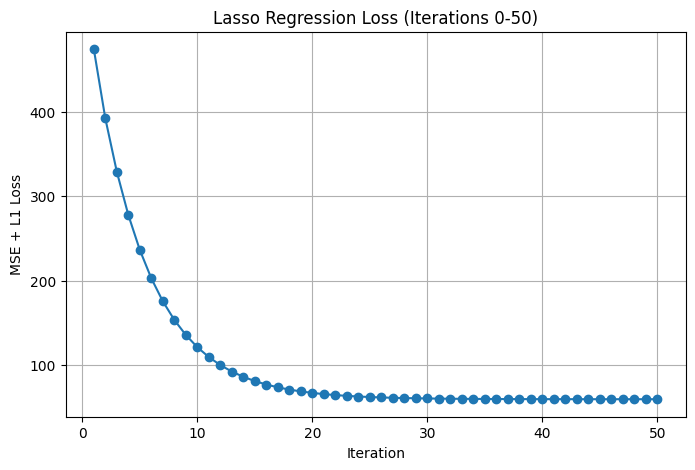

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class LinearRegressionL1:
    def __init__(self, lr=0.01, epochs=1000, l1_lambda=0.1):
        self.lr = lr
        self.epochs = epochs
        self.l1_lambda = l1_lambda

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0.0
        self.losses = []

        for _ in range(self.epochs):
            y_pred = X @ self.w + self.b

            # MSE loss
            mse = np.mean((y - y_pred) ** 2)
            # L1 penalty
            l1 = self.l1_lambda * np.sum(np.abs(self.w))
            loss = mse + l1
            self.losses.append(loss)

            # Gradients
            dw = (-2 / n_samples) * (X.T @ (y - y_pred)) + self.l1_lambda * np.sign(self.w)
            db = (-2 / n_samples) * np.sum(y - y_pred)

            # Update weights and bias
            self.w -= self.lr * dw
            self.b -= self.lr * db

    def predict(self, X):
        return X @ self.w + self.b
#The same existing dataset X_scaled and y(training data is same as to rule out any descrepancies)
model = LinearRegressionL1(lr=0.05, epochs=1000, l1_lambda=9)
model.fit(X_scaled, y)
y_pred = model.predict(X_scaled)

# ploting loss vs iterations
plt.figure(figsize=(8,5))
plt.plot(model.losses)
plt.xlabel("Iteration")
plt.ylabel("MSE + L1 Loss")
plt.title("Lasso Regression Loss vs Iterations")
plt.show()

# plot ground thruth vs predicted
plt.figure(figsize=(8,5))
plt.scatter(X_scaled, y, label="Actual")
plt.scatter(X_scaled, y_pred, label="Predicted")
plt.xlabel("X_scaled")
plt.ylabel("y")
plt.legend()
plt.title("Lasso Regression Predictions")
plt.show()
plt.figure(figsize=(8,5))
plt.plot(range(1, 51), model.losses[:50], marker='o')
plt.xlabel("Iteration")
plt.ylabel("MSE + L1 Loss")
plt.title("Lasso Regression Loss (Iterations 0-50)")
plt.grid(True)
plt.show()


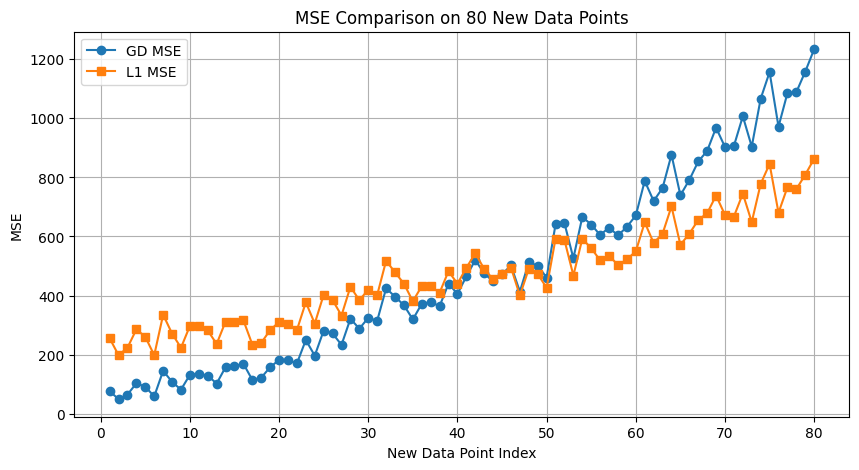

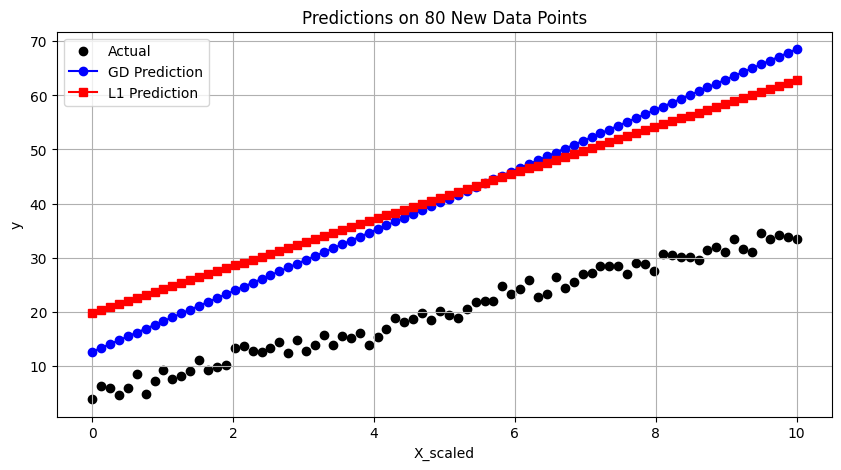

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(123)
x_new = np.linspace(0, 10, 80).reshape(-1,1)
y_new = 3 * x_new.squeeze() + 5 + np.random.randn(80)

x_new_scaled = (x_new - X_scaled.mean(axis=0)) / X_scaled.std(axis=0)

# Predictions on new points
y_pred_l1_new = model.predict(x_new_scaled)        # already-trained L1 model
y_pred_gd_new = gd_model.predict(x_new_scaled)    # already-trained GD model

# Compute MSE per point
mse_l1_new = (y_new - y_pred_l1_new) ** 2
mse_gd_new = (y_new - y_pred_gd_new) ** 2

plt.figure(figsize=(10,5))
plt.plot(range(1,81), mse_gd_new, marker='o', label="GD MSE")
plt.plot(range(1,81), mse_l1_new, marker='s', label="L1 MSE")
plt.xlabel("New Data Point Index")
plt.ylabel("MSE")
plt.title("MSE Comparison on 80 New Data Points")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10,5))
plt.scatter(x_new_scaled, y_new, color='black', label="Actual")
plt.plot(x_new_scaled, y_pred_gd_new, color='blue', marker='o', linestyle='-', label="GD Prediction")
plt.plot(x_new_scaled, y_pred_l1_new, color='red', marker='s', linestyle='-', label="L1 Prediction")
plt.xlabel("X_scaled")
plt.ylabel("y")
plt.title("Predictions on 80 New Data Points")
plt.legend()
plt.grid(True)
plt.show()
#see as randomness increase(more number of data points lasso regression perform much better than gd (its more visible))
#also I tried increasing lambda values from 1 to 3,more the lambda value better results for lass,
#because we penalize it more on mod of slope,it will become more insensitive to new weights and change in them also
#this kinda is like the regression line is not prone to overfitting,of it is not adapting to new data easily as lambda value increased
#variance of the regression line decreases as penalisation value l1_lambda increases


## Question 2: Logistic Regression from Scratch (with Standardization and Regularization)

You are given a binary classification dataset.

### Tasks
1. Reuse your **manual StandardScaler**.
2. Implement **Logistic Regression using Gradient Descent**.
3. Use:
   - Sigmoid function
   - Binary Cross Entropy loss
4. Add **L2 Regularization**.
5. Report:
   - Training loss curve
   - Final accuracy

Do NOT use `sklearn`.


In [ ]:

#Implement sigmoid function as told in the lectures
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#generating random 2D binary classification data
np.random.seed(42)
n_samples = 200

# Class of 0
x0 = np.random.randn(n_samples//2, 2) + np.array([-2, -2])
y0 = np.zeros(n_samples//2)

# Class of 1
x1 = np.random.randn(n_samples//2, 2) + np.array([2, 2])
y1 = np.ones(n_samples//2)

X = np.vstack([x0, x1])
y = np.hstack([y0, y1])


In [ ]:
class StandardScalerManual:
    def fit(self, X):
        self.mean_ = np.mean(X, axis=0)
        self.std_ = np.std(X, axis=0)
        self.std_[self.std_ == 0] = 1
        return self

    def transform(self, X):
        return (X - self.mean_) / self.std_

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

scaler = StandardScalerManual()
X_scaled = scaler.fit_transform(X)


In [ ]:
class LogisticRegressionManual:
    def __init__(self, lr=0.01, epochs=50, l2_lambda=0.0):
        self.lr = lr
        self.epochs = epochs
        self.l2_lambda = l2_lambda

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0.0
        self.losses = []

        for _ in range(self.epochs):
            z = X @ self.w + self.b
            probs = sigmoid(z)

            loss = -np.mean(y * np.log(probs + 1e-15) + (1 - y) * np.log(1 - probs + 1e-15))
            loss += self.l2_lambda * np.sum(self.w**2)
            self.losses.append(loss)

            dw = (X.T @ (probs - y)) / n_samples + 2 * self.l2_lambda * self.w
            db = np.sum(probs - y) / n_samples

            self.w -= self.lr * dw
            self.b -= self.lr * db

    def predict_proba(self, X):
        return sigmoid(X @ self.w + self.b)

    def predict(self, X):
        return (self.predict_proba(X) >= 0.5).astype(int)


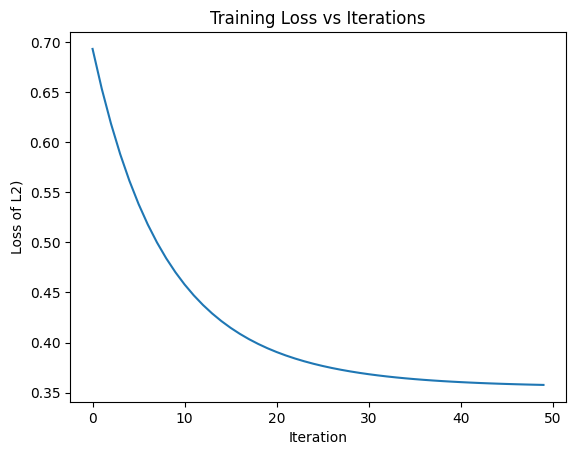

In [ ]:
log_model = LogisticRegressionManual(lr=0.1, epochs=50, l2_lambda=0.1)
log_model.fit(X_scaled, y)
plt.plot(log_model.losses)
plt.xlabel("Iteration")
plt.ylabel("Loss of L2)")
plt.title("Training Loss vs Iterations")
plt.show()


In [ ]:
np.random.seed(356)
x_new = np.random.randn(3500, 2) * 2
y_new = (x_new[:, 0] + x_new[:, 1] > 0).astype(int)

x_new_scaled = scaler.transform(x_new)

new_preds = log_model.predict(x_new_scaled)
new_accuracy = np.mean(new_preds == y_new)
print("Accuracy on 35 new points:", new_accuracy)


Accuracy on 35 new points: 0.9931428571428571


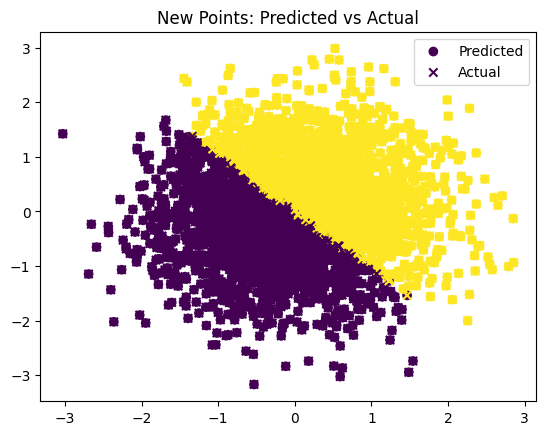

In [ ]:
plt.scatter(x_new_scaled[:, 0], x_new_scaled[:, 1], c=new_preds, marker='o', label="Predicted")
plt.scatter(x_new_scaled[:, 0], x_new_scaled[:, 1], c=y_new, marker='x', label="Actual")
plt.legend()
plt.title("New Points: Predicted vs Actual")
plt.show()



## Question 3: K-Means Clustering from Scratch (Matrix Clustering)

You are given a **random matrix** `M` of shape `(n, m)`.

### Tasks
Implement K-Means clustering **from scratch** such that:

1. Input:
   - A random matrix `M`
   - Number of clusters `k`
2. Output:
   - `assignment_table`: a matrix of same shape as `M`, where each element stores the **cluster label**
   - `cookbook`: a dictionary (hashmap) where:
     - Key = cluster index
     - Value = list of **positions (i, j)** belonging to that cluster
   - `centroids`: array storing centroid values

You must cluster **individual elements**, not rows.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#i have made it to run 100 times choosing random points because sometimes k means ends up clustering wrok
#so,thats why its necessary to repeat it many times with different random starting points
def kmeans_matrix(M, num_clusters, max_iter=100, random_trials=4):
    n, m = M.shape
    flat_vals = M.flatten()
    positions = [(i,j) for i in range(n) for j in range(m)]

    best_labels = None
    best_centroids = None
    lowest_loss = np.inf

    for trial in range(random_trials):
        # picking random initial centroids
        centroids = np.random.choice(flat_vals, size=num_clusters, replace=False)

        for _ in range(max_iter):
            # assigning each element to nearest centroid
            labels = []
            for val in flat_vals:
                distances = [abs(val - c) for c in centroids]
                labels.append(np.argmin(distances))
            labels = np.array(labels)

            # updating centroids
            new_centroids = []
            for i in range(num_clusters):
                cluster_vals = flat_vals[labels == i]
                if len(cluster_vals) > 0:
                    new_centroids.append(np.mean(cluster_vals))
                else:
                    new_centroids.append(centroids[i])
            new_centroids = np.array(new_centroids)

            # checking for convergence
            if np.allclose(new_centroids, centroids):
                break
            centroids = new_centroids

        # computing loss for this trial(for optimal clustering)
        loss = np.sum((flat_vals - centroids[labels])**2)
        if loss < lowest_loss:
            lowest_loss = loss
            best_labels = labels.copy()
            best_centroids = centroids.copy()

    # building cookbook with (i,j) positions
    cookbook = {i: [] for i in range(num_clusters)}
    for idx, lbl in enumerate(best_labels):
        cookbook[lbl].append(positions[idx])

    # assignment table in matrix form
    assignment_table = best_labels.reshape(n, m)

    return assignment_table, cookbook, best_centroids


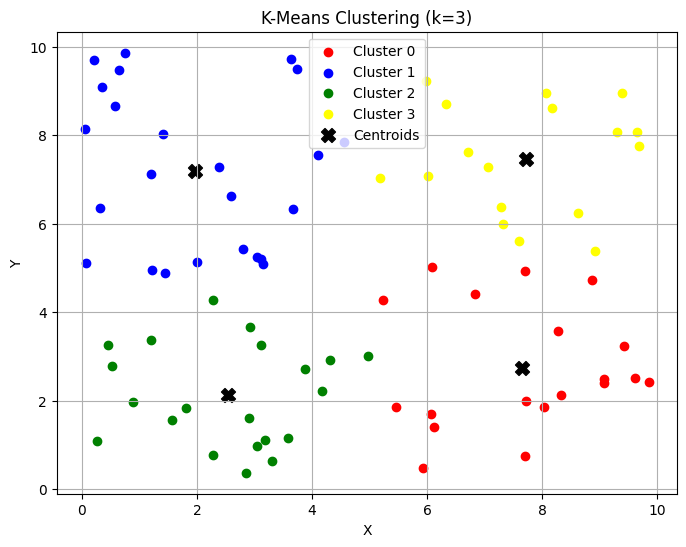

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)
n = 81
points = np.random.rand(n, 2) * 10  # 81 random points
k = 4

assignments, cookbook, centroids = kmeans_points(points, k)

colors = ['red', 'blue', 'green','yellow']
plt.figure(figsize=(8,6))
for cluster_idx in range(k):
    cluster_points = points[assignments == cluster_idx]
    plt.scatter(cluster_points[:,0], cluster_points[:,1], color=colors[cluster_idx], label=f"Cluster {cluster_idx}")

# Plotting centroids
plt.scatter(centroids[:,0], centroids[:,1], color='black', marker='X', s=100, label='Centroids')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("K-Means Clustering (k=3)")
plt.legend()
plt.grid(True)
plt.show()


## Submission Guidelines
- Submit the completed `.ipynb` file.
- Clearly label all plots and outputs.
- Code readability and correctness matter.
- Partial credit will be given for logically correct implementations.

**Bonus**
- Compare convergence with and without standardization.
- Try different values of regularization strength.
